# Import des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler 
from sklearn.compose import ColumnTransformer, make_column_transformer

In [5]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [7]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance

# Chargement du fichier

In [3]:
data=pd.read_csv('Data_cleané.csv',index_col=0)

In [4]:
data.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

   customer_zip_code_prefix    customer_city customer_state  \
0                     14409           franca             SP   
1                     68030         santarem             PA   
2                     68030         santarem             PA   
3                     92480  nova santa rita             RS   
4                     25931             mage             RJ   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
2  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
3  b1a5d5365d330d10485e0203d54ab9e8    delivered      2017-05-07 20:11:26   
4  2e604b3614664aa66867856dba7e61b7    delivered      2018-02-03 19:45:40   

     order_approved_at order_delivered_carrier_date  ...  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57  ...   
1  2017-11-10 00:47:48          2017-11-22 01:43:37  ...   
2  2017-11-10 00:47:48          2017-11-22 01:43:37  ...   
3  2017-05-08 22:22:56          2017-05-19 20:16:31  ...   
4  2018-02-04 22:29:19          2018-02-19 18:21:47  ...   

                          review_id review_score  product_name_lenght  \
0  88b8b52d46df026a9d1ad2136a59b30b            4                 41.0   
1  7fc63200f12eebb5f387856afdd63db8            1                 41.0   
2  7fc63200f12eebb5f387856afdd63db8            1                 41.0   
3  251191809e37c1cffc16865947c18a4d            3                 41.0   
4  f7123bac5b91a0e2e38d8b41fd1206f4            4                 41.0   

  product_description_lenght  product_photos_qty  product_weight_g  \
0                     1141.0                 1.0            8683.0   
1                     1141.0                 1.0            8683.0   
2                     1141.0                 1.0            8683.0   
3                     1141.0                 1.0            8683.0   
4                     1141.0                 1.0            8683.0   

   product_length_cm product_height_cm  product_width_cm  \
0               54.0              64.0              31.0   
1               54.0              64.0              31.0   
2               54.0              64.0              31.0   
3               54.0              64.0              31.0   
4               54.0              64.0              31.0   

  product_category_name_english  
0              office_furniture  
1              office_furniture  
2              office_furniture  
3              office_furniture  
4              office_furniture  

[5 rows x 29 columns]

In [5]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id', 'price',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'review_id', 'review_score',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

On définit une fonction 

In [6]:
def Boxplot(Base, colonne):
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=Base, x=colonne)
    plt.title('Dispersion de la variable {}'.format(colonne))
    sns.displot(data=Base, x=colonne, bins=20, kde=True)
    plt.title('Dispersion de la variable {}'.format(colonne))

# Réorganisation des colonnes

In [7]:
data['order_purchase_timestamp']=pd.to_datetime(data['order_purchase_timestamp'])
data['order_delivered_customer_date']=pd.to_datetime(data['order_delivered_customer_date'])

In [8]:
data['Durée_livraison']=data['order_delivered_customer_date']-data['order_purchase_timestamp']

In [9]:
data['Durée_livraison']=data['Durée_livraison'].apply(lambda x: x.days)
#data['Durée_livraison'].dt.days on peut utiliser cette technique

In [10]:
data['Durée_livraison']

0          8
1         18
2         18
3         18
4         25
          ..
113189     8
113190     7
113191     2
113192    19
113193    11
Name: Durée_livraison, Length: 113194, dtype: int64

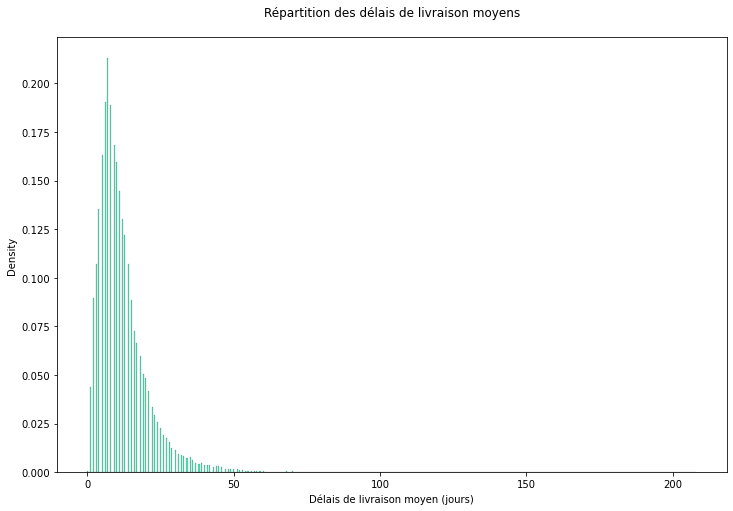

In [11]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=data, x="Durée_livraison",
             stat="density",
             edgecolor="black",
             color="#00d994", alpha=0.7)
plt.xlabel("Délais de livraison moyen (jours)")
plt.title(f"Répartition des délais de livraison moyens\n")
plt.show()

# Récence

In [12]:
# obtenir la date maximale de commande pour chaque client
datecommande_max = data.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()

In [13]:
datecommande_max.columns=['customer_unique_id','date_achat_max']

In [14]:
datecommande_max['date_achat_max'].max()

Timestamp('2018-08-29 15:00:37')

In [15]:
datecommande_max['Récence'] = (datecommande_max['date_achat_max'].max() - datecommande_max['date_achat_max']).dt.days

In [16]:
datecommande_max.head()

customer_unique_id      date_achat_max  Récence
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27      111
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27      114
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03      536
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41      320
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42      287

In [25]:
#datecommande_max.drop(["Recency"],axis=1, inplace=True)

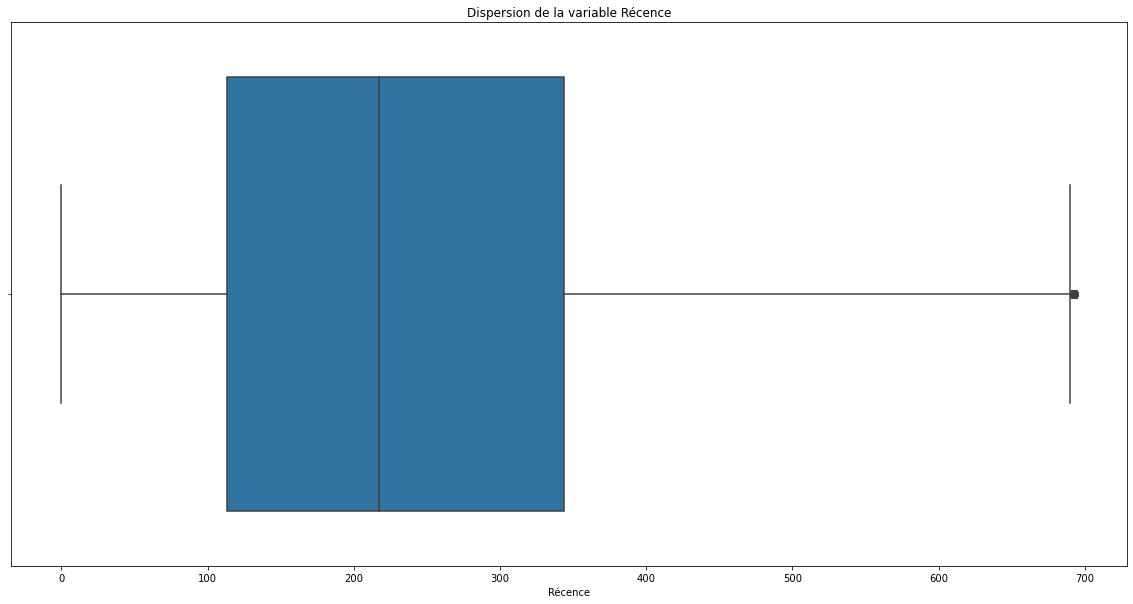

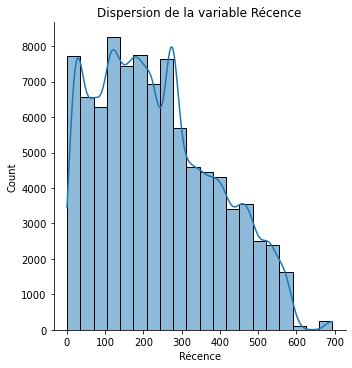

In [17]:
Boxplot(datecommande_max,'Récence')

In [18]:
datecommande_max['Récence'].describe()

count    91466.000000
mean       236.097807
std        152.581955
min          0.000000
25%        113.000000
50%        217.000000
75%        344.000000
max        694.000000
Name: Récence, dtype: float64

En moyenne un client reste 236 jours avant de commander et la médiane est de 217. La moyenne étant supérieure à la médiane, nous concluons que la plupart des clients attendent au minimum 236 jours avant de commander.

# Fréquence

In [19]:
frequence=data.groupby('customer_unique_id')['order_purchase_timestamp'].count().reset_index()

In [20]:
frequence.columns=['customer_unique_id','frequence_commande']

In [21]:
frequence['frequence_commande'].describe()

count    91466.000000
mean         1.237553
std          0.844380
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         75.000000
Name: frequence_commande, dtype: float64

In [22]:
frequence.head()

customer_unique_id  frequence_commande
0  0000366f3b9a7992bf8c76cfdf3221e2                   1
1  0000b849f77a49e4a4ce2b2a4ca5be3f                   1
2  0000f46a3911fa3c0805444483337064                   1
3  0000f6ccb0745a6a4b88665a16c9f078                   1
4  0004aac84e0df4da2b147fca70cf8255                   1

# Montant total dépensé

On calcule d'abord le prix du produit :

In [23]:
#le prix que le client paye avec  le nombre de produits quil a commande 
data['Prix_produit']=(data['price']*data['order_item_id'])

Ensuite on calcule le prix de la livraison : 

In [24]:
data['Prix_Livraison']=(data['freight_value']*data['order_item_id'])

Le prix de l'achat correspond au prix du produit et au prix de la livraison.

In [25]:
data['Montant_achat']=(data['price']*data['order_item_id'])+(data['freight_value']*data['order_item_id'])

In [26]:
from scipy.special import exp10
from sklearn.preprocessing import FunctionTransformer
import math as mt

In [27]:
Passage_Log = FunctionTransformer(func=np.log10,inverse_func=exp10)

In [28]:
data['Montant_achat_LOG']=Passage_Log.fit_transform(data['Montant_achat'])

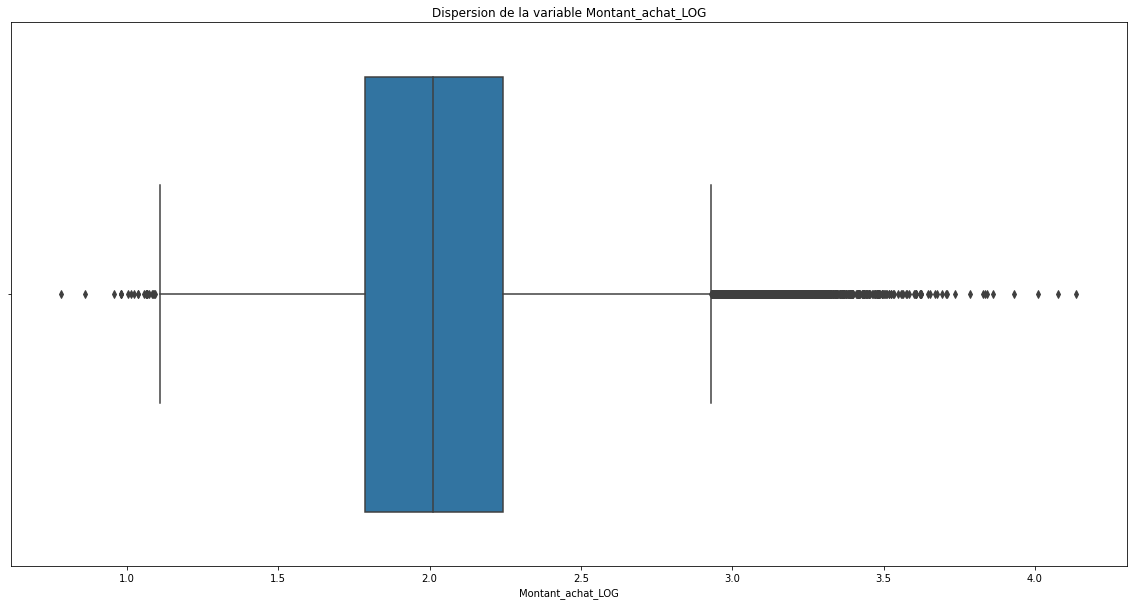

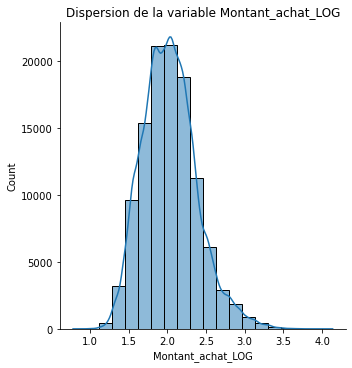

In [29]:
Boxplot(data,'Montant_achat_LOG')

In [30]:
Montant=data.groupby('customer_unique_id')[['Montant_achat','Prix_Livraison','Prix_produit']].sum().reset_index()

In [31]:
Montant.columns=['customer_unique_id','Somme_depensee','Somme_Livraison','Somme_produit']

In [32]:
Montant.describe()

Somme_depensee  Somme_Livraison  Somme_produit
count    91466.000000     91466.000000   91466.000000
mean       197.030610        29.180843     167.849767
std        424.517732        58.457703     391.613334
min         10.070000         0.000000       0.850000
25%         64.460000        14.100000      49.000000
50%        113.710000        17.850000      91.900000
75%        200.750000        27.490000     169.990000
max      61488.360000      6282.360000   60480.000000

# Catégorie

On prend la categorie où le client a paye le plus sur ces paiements pour notre raisonnement :

In [33]:
category = data.groupby('customer_unique_id')[['product_category_name_english','Montant_achat']].max().reset_index()

In [34]:
category.head()

customer_unique_id product_category_name_english  \
0  0000366f3b9a7992bf8c76cfdf3221e2                bed_bath_table   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                 health_beauty   
2  0000f46a3911fa3c0805444483337064                    stationery   
3  0000f6ccb0745a6a4b88665a16c9f078                     telephony   
4  0004aac84e0df4da2b147fca70cf8255                     telephony   

   Montant_achat  
0         141.90  
1          27.19  
2          86.22  
3          43.62  
4         196.89

In [35]:
category = category.rename(columns={"product_category_name_english": "product_category_name"})

Autre variable à créer, la catégorie de produit de niveau 1. En effet, le jeu de données compte plus de 70 catégories différentes (ce qui peut poser problème pour un encodage lors des preprocessing). Nous allons donc devoir regrouper plusieurs de ces catégorie dans une catégorie de niveau supérieur.

Pour cela, nous allons nous baser sur les catégories principales des sites de vente en ligne :

Fashion, clothing and accessories
Health and Beauty
Toys and baby equipment
Books, CDs and other physical media
Groceries, food and drink
Technology (including phones and computers)
Home and furniture
Flowers and gifts
Other

In [36]:
category['product_category'] = np.where((category['product_category_name'].str.contains("fashio|luggage")==True),
                                    'fashion_clothing_accessories',
                           np.where((category['product_category_name'].str.contains("health|beauty|perfum")==True),
                                    'health_beauty',
                           np.where((category['product_category_name'].str.contains("toy|baby|diaper")==True),
                                     'toys_baby',
                           np.where((category['product_category_name'].str.contains("book|cd|dvd|media")==True),
                                     'books_cds_media',
                           np.where((category['product_category_name'].str.contains("grocer|food|drink")==True), 
                                     'groceries_food_drink', np.where((category['product_category_name'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                     'technology',
                           np.where((category['product_category_name'].str.contains("home|furnitur|garden|bath|house|applianc")==True), 
                                                                                          'home_furniture',
                           np.where((category['product_category_name'].str.contains("flow|gift|stuff")==True),
                                     'flowers_gifts',
                           np.where((category['product_category_name'].str.contains("sport")==True),
                                     'sport',
                                     'other')))))))))

In [37]:
category=category.drop(columns=['Montant_achat'])

In [39]:
category.columns=['customer_unique_id','product_category_name','product_category']

In [40]:
category['product_category'].value_counts()

home_furniture                  27757
technology                      14068
health_beauty                   11315
other                           11043
flowers_gifts                    8830
sport                            7246
toys_baby                        6342
fashion_clothing_accessories     3148
groceries_food_drink              885
books_cds_media                   832
Name: product_category, dtype: int64

In [41]:
category.head()

customer_unique_id product_category_name product_category
0  0000366f3b9a7992bf8c76cfdf3221e2        bed_bath_table   home_furniture
1  0000b849f77a49e4a4ce2b2a4ca5be3f         health_beauty    health_beauty
2  0000f46a3911fa3c0805444483337064            stationery            other
3  0000f6ccb0745a6a4b88665a16c9f078             telephony       technology
4  0004aac84e0df4da2b147fca70cf8255             telephony       technology

<Figure size 144x144 with 0 Axes>

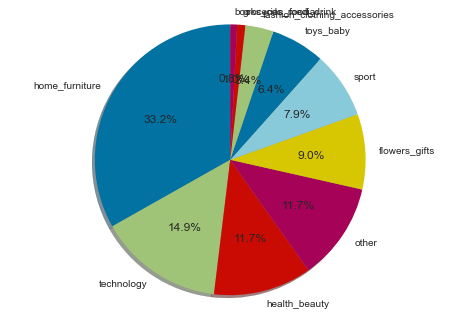

In [157]:
proportion_category = data["product_category"].value_counts() 
labels = proportion_category.index
fig, ax = plt.subplots()
ax.pie(proportion_category, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

# Volume du produit

In [42]:
# Calculate product volume length * height * width
data['product_volume'] = data['product_height_cm'] * data['product_length_cm'] * data['product_width_cm']

In [43]:
data['product_volume'].describe()

count    113193.000000
mean      15305.660253
std       23408.715660
min         168.000000
25%        2856.000000
50%        6612.000000
75%       18468.000000
max      296208.000000
Name: product_volume, dtype: float64

# Concaténation de nos nouvelles features

In [44]:
data=pd.merge(data,frequence, on='customer_unique_id')

In [45]:
data=pd.merge(data,datecommande_max,on='customer_unique_id')

In [46]:
data=pd.merge(data,Montant,on='customer_unique_id')

In [47]:
data=pd.merge(data,category,on='customer_unique_id')

In [48]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id', 'price',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'review_id', 'review_score',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'Durée_livraison', 'Prix_produit',
       'Prix_Livraison', 'Montant_achat', 'Montant_achat_LOG',
       'product_volume', 'frequence_commande', 'date_achat_max', 'Récence',
       'Somme_depensee', 'Somme_Livraison', 'Somme_produit',
       'product_category_name', 'product_category'],
      dtype='object')

# Passage en log

In [49]:
data['Somme_depensee_LOG']=Passage_Log.fit_transform(data['Somme_depensee'])
data['Somme_livraison_LOG']=Passage_Log.fit_transform(data['Somme_Livraison'])
data['Somme_produit_LOG']=Passage_Log.fit_transform(data['Somme_produit'])

C:\Users\nha5600\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Preprocessing

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score

# Clustering Librairies import
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth

In [51]:
from sklearn import metrics, cluster

In [52]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id', 'price',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'review_id', 'review_score',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'Durée_livraison', 'Prix_produit',
       'Prix_Livraison', 'Montant_achat', 'Montant_achat_LOG',
       'product_volume', 'frequence_commande', 'date_achat_max', 'Récence',
       'Somme_depensee', 'Somme_Livraison', 'Somme_produit',
       'product_category_name', 'product_category', 'Somme_depensee_LOG',
 

# Encodage des variables catégorielles

In [111]:
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(data_selection[["product_category"]])
data_categ =pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)

# Sélection des colonnes

Nous faisons notre segmentation de marché avec la segementation RFM. La méthode de segmentation RFM permet un classement des clients en fonction de leurs habitudes d'achat. On peut ainsi optimiser une stratégie marketing en fonction de nos clients. Le classement RFM se fait en fonction de 3 critères : Récence (date de la dernière commande), la Fréquence des commandes et le Montant (sur une période donnée) pour établir des segments de clients homogènes.
Récence indique la date du dernier achat. Il s'agit du nombre de jours depuis la dernière commande d'un client.
Fréquence est le nombre d'achat sur une période déterminé. Cela peut être 3 mois, 6 mois ou un 1 an. Elle indique la fidélité d'un client, plus sa valeur est élevé et plus le client est engagé.
Montant est la somme totale qu'un client dépense sur une période donnée
La segmentation RFM permet de cibler les offres, d'établir des segments basés sur la valeur des clients et de prévenir l'attrition en identifiant des segments à risque. J'ajoute à mon analyse des données basées sur la livraison et la satisfaction client.

In [53]:
features_selection = ['customer_unique_id', 'Durée_livraison', 'review_score'
,'frequence_commande', 'Récence','Somme_depensee_LOG']

In [63]:
features_final = ['frequence_commande', 'Récence','Somme_depensee_LOG',
                  'Durée_livraison', 'review_score']

In [64]:
index=data.columns.isin(features_final)

In [65]:
data_final = data[data.columns[index]]

In [66]:
data_final

review_score  Durée_livraison  frequence_commande  Récence  \
0                  4                8                   1      469   
1                  1               18                   2      293   
2                  1               18                   2      293   
3                  3               18                   1      478   
4                  4               25                   1      206   
...              ...              ...                 ...      ...   
113189             5                4                   1      446   
113190             5                7                   1      324   
113191             5                2                   1      468   
113192             4               19                   1      580   
113193             1               11                   1      345   

        Somme_depensee_LOG  
0                 2.166933  
1                 2.616654  
2                 2.616654  
3                 2.148016  
4                 2.138555  
...                    ...  
113189            2.075401  
113190            1.733117  
113191            2.095239  
113192            2.320271  
113193            2.062394  

[113194 rows x 5 columns]

<AxesSubplot:>

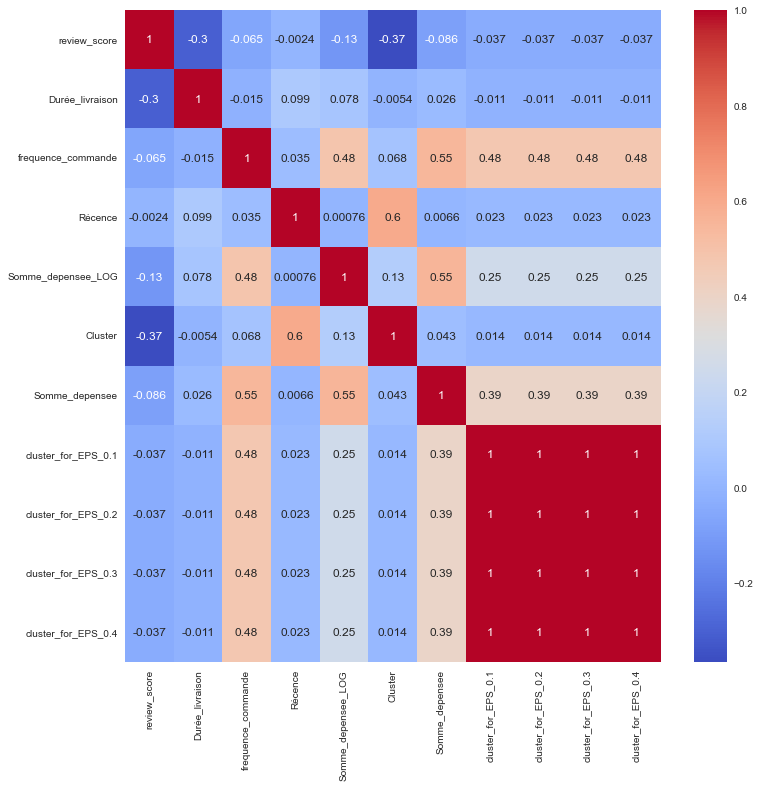

In [158]:
cor=data_final.corr()
fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(cor,annot=True,ax=ax,cmap='coolwarm')

In [139]:
#data_final = data_final.drop(columns='Montant_achat_LOG')

In [67]:
X = data_final.values

In [68]:
X

array([[  4.        ,   8.        ,   1.        , 469.        ,
          2.16693309],
       [  1.        ,  18.        ,   2.        , 293.        ,
          2.61665403],
       [  1.        ,  18.        ,   2.        , 293.        ,
          2.61665403],
       ...,
       [  5.        ,   2.        ,   1.        , 468.        ,
          2.09523911],
       [  4.        ,  19.        ,   1.        , 580.        ,
          2.32027095],
       [  1.        ,  11.        ,   1.        , 345.        ,
          2.06239394]])

# Preprocessing

In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

from sklearn.compose import ColumnTransformer, make_column_transformer

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance

In [69]:
scaler = StandardScaler()

preprocessor = ColumnTransformer([('standard-scaler',scaler,features_final)])

X_scaled = preprocessor.fit_transform(data_final)

X_scaled

array([[-0.28552359,  1.52231856, -0.04386859, -0.42473876, -0.06130643],
       [ 0.06538689,  0.36857757,  0.94631046,  0.64340695, -2.29027417],
       [ 0.06538689,  0.36857757,  0.94631046,  0.64340695, -2.29027417],
       ...,
       [-0.28552359,  1.51576322, -0.20172178, -1.06562618,  0.68168282],
       [-0.28552359,  2.24996203,  0.29374506,  0.75022152, -0.06130643],
       [-0.28552359,  0.70945559, -0.27403908, -0.10429505, -2.29027417]])

# Evaluation du cluster : Méthode du coude

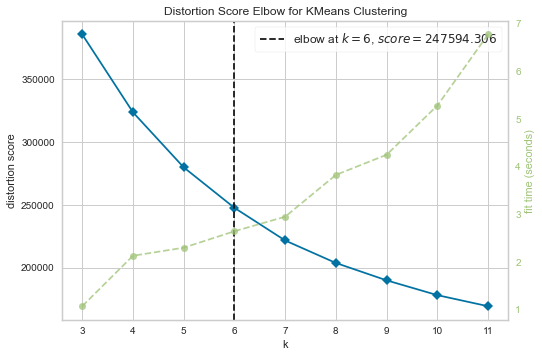

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
# on va regarder le nombre de cluster avec la methode eblow
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(3, 12))

visualizer.fit(X_scaled)  
visualizer.poof()

# Evaluation du cluster : Méthode des métriques

Nous testons des types de métriques pour trouver le meilleur K :
Une segementation en clusters serait la meilleure option.

Distortion : somme moyenne des carrés des distances aux centres,
Silouhette : rapport moyen entre la distance intra-cluster et la distance du cluster le plus proche,
Calinski Harabasz : rapport entre la dispersion des clusters dans et entre les groupes.

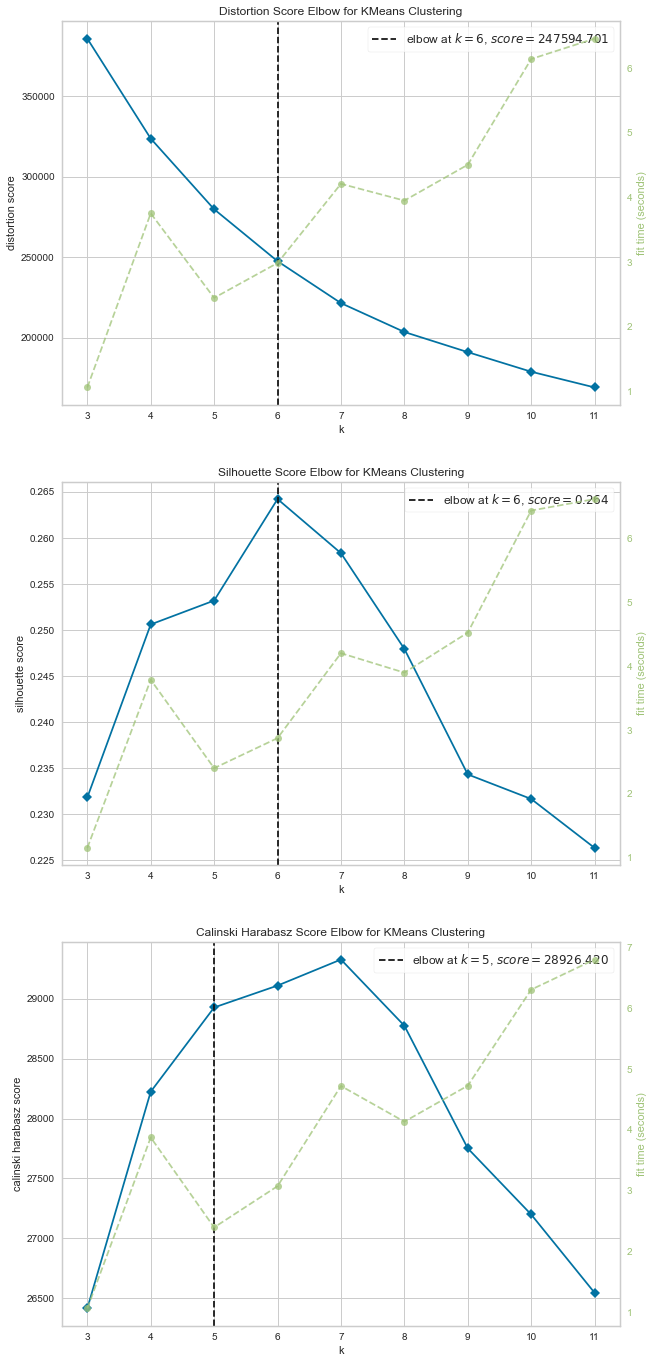

In [71]:
# Elbow method with differents metrics
metrics = ["distortion", "silhouette", "calinski_harabasz"]
i = 0

# Model fitting
model = KMeans(max_iter=300,
               n_init=10,
               random_state=123)

fig, axes = plt.subplots(nrows=3,
                         ncols=1,
                         sharex=False,
                         sharey=False,
                         figsize=(10, 24))

# Plot for each differents metrics
for m in metrics:
    kmeans_visualizer = KElbowVisualizer(model,
                                         k=(3, 12),
                                         metric=m,
                                         ax=axes[i])
    kmeans_visualizer.fit(X_scaled)
    kmeans_visualizer.finalize()
    i += 1

plt.show()

La méthode du coude suggère de séparer le client en 6 groupes. Nous allons utiliser le score de silouhette pour revérifier ces résultats pour 5 et 6 clusters.

L'analyse de silhouette peut être utilisée pour étudier la distance de séparation entre les clusters résultants. Le diagramme de silhouette affiche une mesure de la proximité de chaque point d'un cluster avec les points des clusters voisins et fournit ainsi un moyen d'évaluer visuellement des paramètres tels que le nombre de clusters. Cette mesure a une plage de [-1, 1].

Les coefficients de silhouette (comme ces valeurs sont appelées) proches de +1 indiquent que l'échantillon est éloigné des grappes voisines. Une valeur de 0 indique que l'échantillon est sur ou très proche de la limite de décision entre deux clusters voisins et des valeurs négatives indiquent que ces échantillons ont peut-être été affectés au mauvais cluster.

# PCA

In [72]:
# Function to create PCA correlation circle

def cerle_corr(n_comp, pca, axis_ranks,
               labels=None, label_rotation=0):

    pcs = pca.fit(X_scaled).components_

    fig = plt.figure(figsize=(20, n_comp*5))
    count = 1
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # plot init
            fig.subplots_adjust(left=0.1,
                                right=0.9,
                                bottom=0.1,
                                top=0.9)
            ax = plt.subplot(int(n_comp / 2), 2, count)
            ax.set_aspect('equal', adjustable='box')

            # Gaphics limit definition
            ax.set_xlim(-1, 1)
            ax.set_ylim(-1, 1)

            # shows arrow
            ax.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                      pcs[d1, ], pcs[d2, :],
                      angles='xy', scale_units='xy', scale=1,
                      color="grey", alpha=0.5)
            # and variable name
            for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                ax.annotate(labels[i], (x, y),
                            ha='center', va='center',
                            fontsize='14', color="#17aafa", alpha=0.8)
            # add axis
            ax.plot([-1, 1], [0, 0], linewidth=1, color='grey', ls='--')
            ax.plot([0, 0], [-1, 1], linewidth=1, color='grey', ls='--')

            # add circle
            cercle = plt.Circle((0, 0), 1, color='#17aafa', fill=False)
            ax.add_artist(cercle)

            # axis name, and explicate inertia percentage
            ax.set_xlabel('F{} ({}%)'
                          .format(d1+1,
                                  round(100*pca
                                        .explained_variance_ratio_[d1], 1)))
            ax.set_ylabel('F{} ({}%)'
                          .format(d2+1,
                                  round(100*pca
                                        .explained_variance_ratio_[d2], 1)))

            ax.set_title("Correlation circle (F{} and F{})".format(d1+1, d2+1))
            count += 1

    plt.suptitle("Cercles de corrélation".format(n_comp),
                 y=.9, color="blue", fontsize=18)
    plt.show(block=False)

Eboulis des valeurs propres 

In [127]:
def eboulis_vp (pca):
    eboulis = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(eboulis))+1, eboulis)
    plt.plot(np.arange(len(eboulis))+1, eboulis.cumsum(), c="red", marker='o')
    plt.xlabel("Rang de l'axe d'inertie")
    plt.ylabel("Pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [128]:
from sklearn import decomposition

In [129]:
n_comp=4
pca=decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=4)

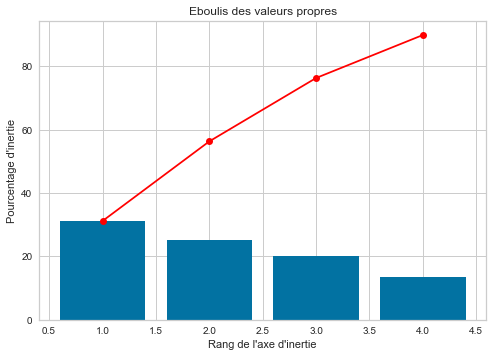

In [131]:
eboulis_vp(pca)

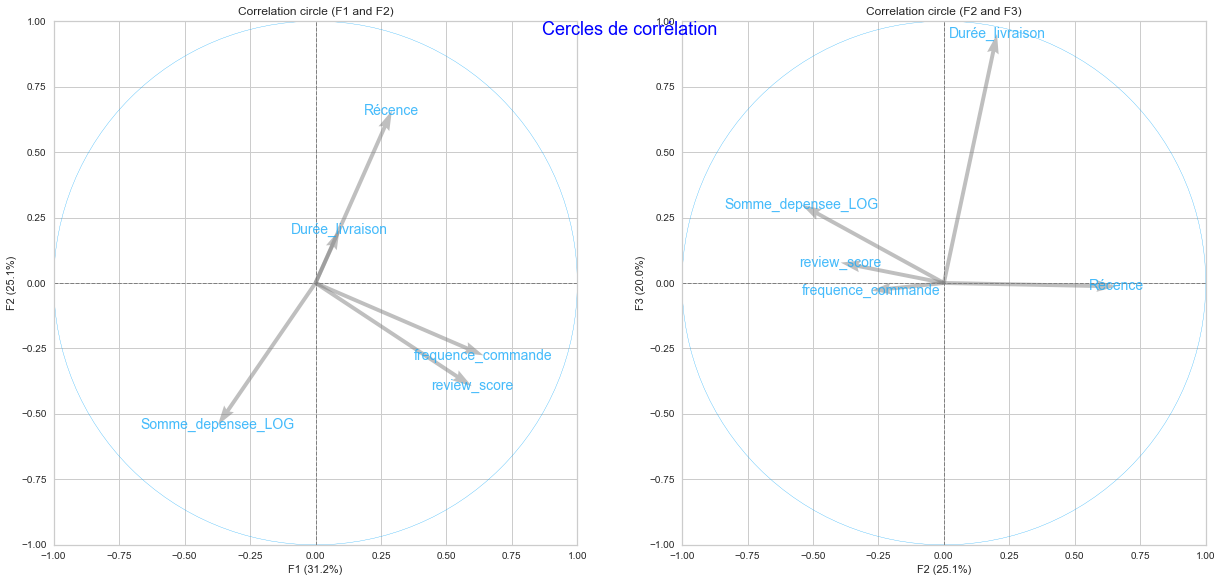

In [133]:
# Plot correlation circle
cerle_corr(n_comp=4,
           pca=PCA(3),
           axis_ranks=[(0, 1), (1, 2)],
           labels=np.array(data_final.columns))

# Réalisation du Kmeans

In [74]:
my_clust=cluster.KMeans(n_clusters=6)
my_clust.fit(X_scaled)

KMeans(n_clusters=6)

In [75]:
data_final.columns

Index(['review_score', 'Durée_livraison', 'frequence_commande', 'Récence',
       'Somme_depensee_LOG'],
      dtype='object')

In [76]:
labels = pd.DataFrame(my_clust.labels_)
data_final = data_final.assign(Cluster=labels)

In [77]:
my_clust.cluster_centers_

array([[-2.19448087e-01, -7.67005771e-01, -4.37044408e-01,
        -2.99601338e-01,  4.31291634e-01],
       [-1.44924889e-01,  1.68947724e-02,  8.51116008e-03,
         2.72895170e+00, -1.48081763e+00],
       [ 6.33217984e-01, -1.23152276e-01,  1.47645590e+00,
        -6.91271939e-02,  3.27127168e-01],
       [ 1.05431453e+01,  4.94442723e-01,  3.28317854e+00,
         9.42495932e-02, -4.79592358e-01],
       [-1.96866663e-01,  1.05278917e+00, -3.39910803e-01,
        -1.08667611e-01,  3.85425365e-01],
       [ 7.29928591e-02, -6.90327675e-02,  2.94673872e-01,
        -3.81695441e-02, -1.91067392e+00]])

In [78]:
data_final.head()

review_score  Durée_livraison  frequence_commande  Récence  \
0             4                8                   1      469   
1             1               18                   2      293   
2             1               18                   2      293   
3             3               18                   1      478   
4             4               25                   1      206   

   Somme_depensee_LOG  Cluster  
0            2.166933        4  
1            2.616654        5  
2            2.616654        5  
3            2.148016        4  
4            2.138555        0

# Interpréation Clusters

In [79]:
data_final['Somme_depensee']=Passage_Log.inverse_transform(data_final['Somme_depensee_LOG'])

In [80]:
data_final.groupby('Cluster')[['Récence','frequence_commande','Somme_depensee','Durée_livraison','review_score']].mean().round(1)

Récence  frequence_commande  Somme_depensee  Durée_livraison  \
Cluster                                                                 
0          119.9                 1.2           120.1              9.2   
1          239.4                 1.4           256.7             37.6   
2          217.3                 3.6          1073.0             11.3   
3          312.2                31.9          6775.8             12.9   
4          397.5                 1.3           139.0             11.0   
5          226.2                 2.0           350.6             11.6   

         review_score  
Cluster                
0                 4.7  
1                 2.1  
2                 4.5  
3                 3.4  
4                 4.6  
5                 1.5

In [81]:
data_final['Cluster'].value_counts()

0    42497
4    33417
2    16278
5    13908
1     6570
3      524
Name: Cluster, dtype: int64

In [159]:
data_cluster =pd.DataFrame({'Cluster':data_final['Cluster'].value_counts().index,'Nombre de clients':data_final['Cluster'].value_counts().values})

Text(0.5, 1.0, 'Nombre de clients par Clusters')

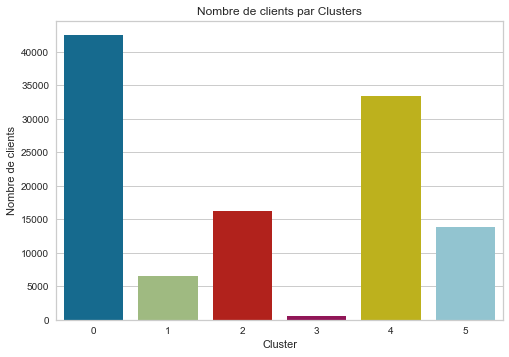

In [161]:
plt.figure()
sns.barplot(x='Cluster',y='Nombre de clients',data=data_cluster.sort_values('Cluster',ascending=False))
plt.title('Nombre de clients par Clusters')

# Performance Cluster

In [82]:
metrics

['distortion', 'silhouette', 'calinski_harabasz']

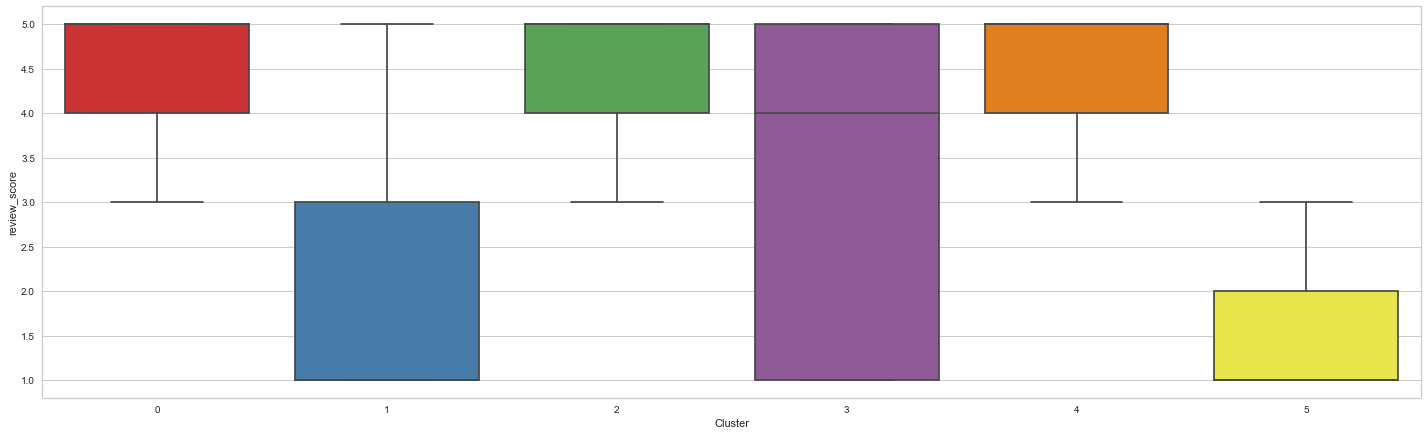

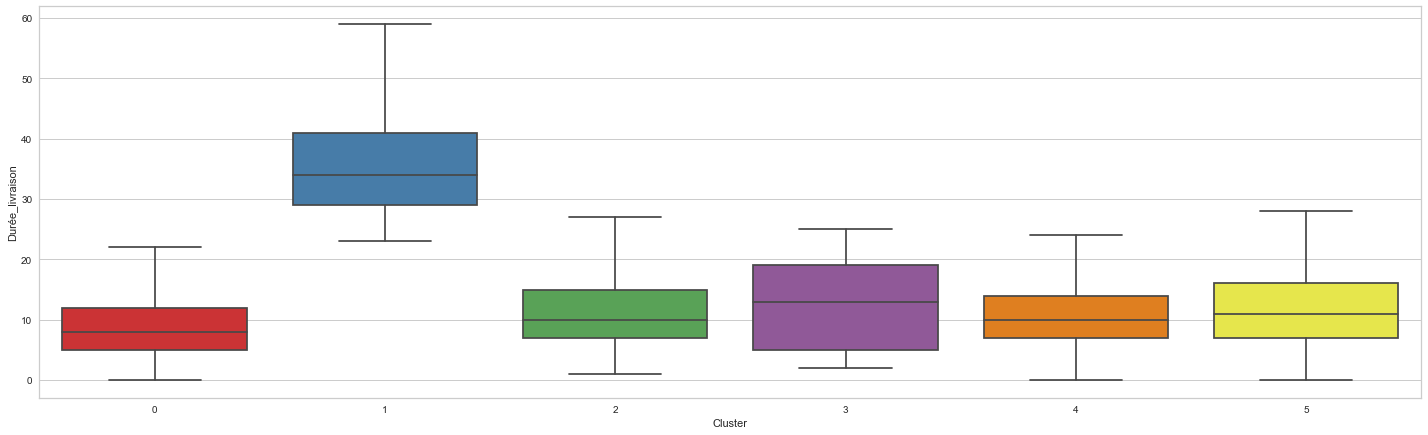

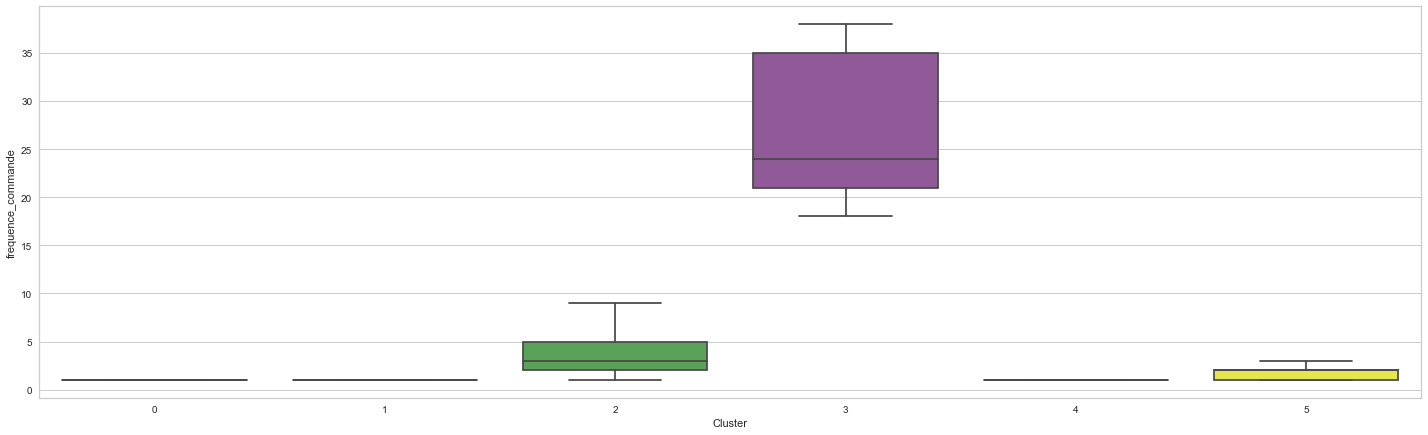

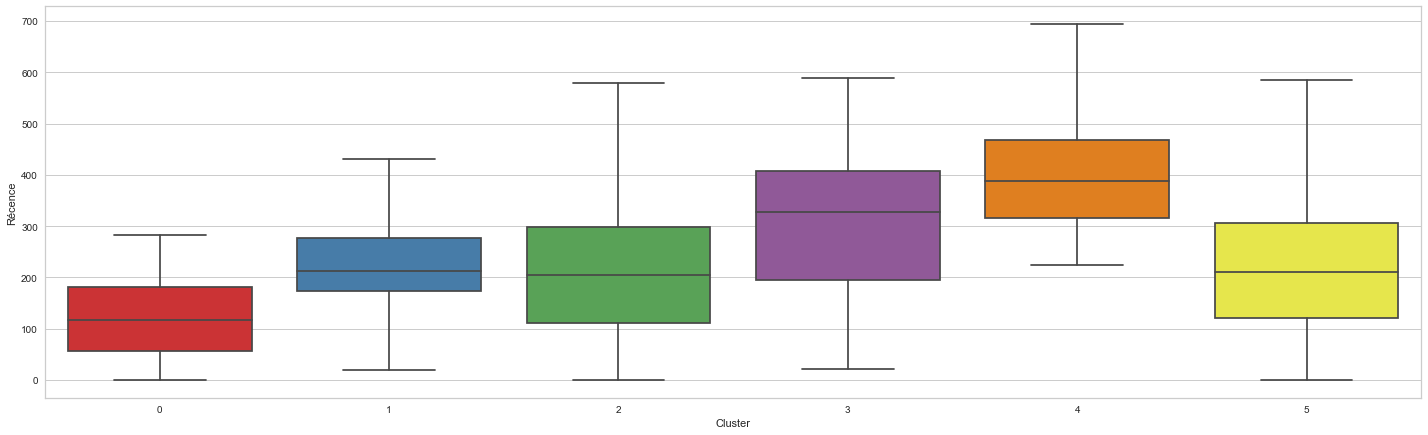

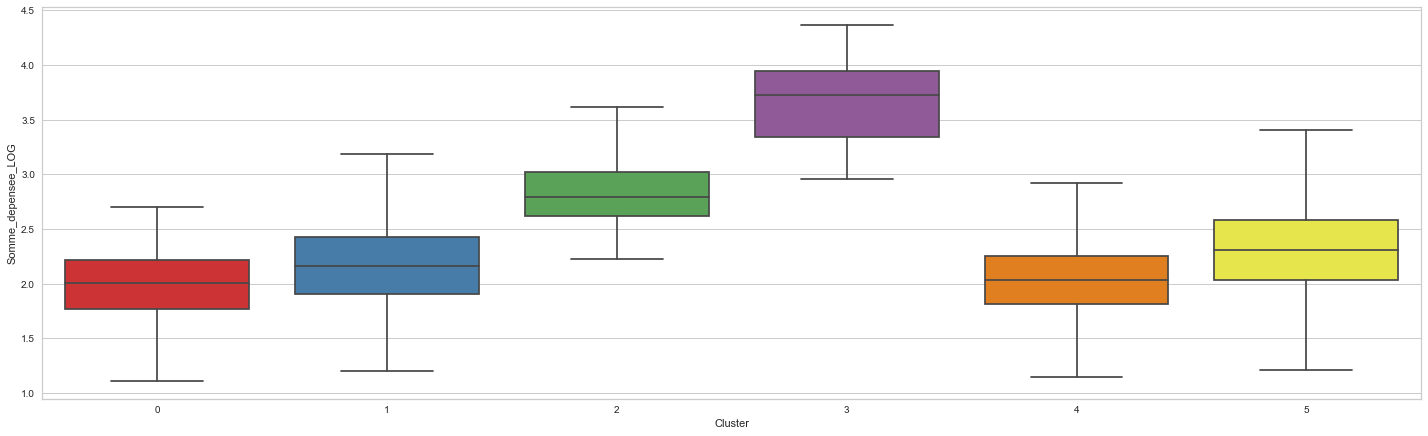

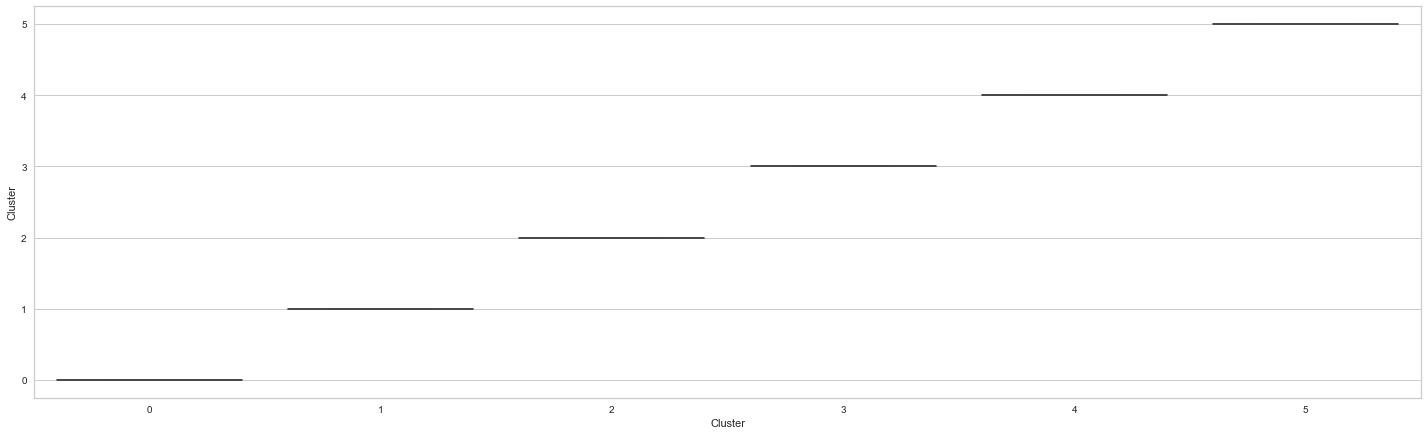

In [83]:
# Boxplot of each featurs per cluster
for i, col in enumerate(data_final.iloc[:, :-1].columns):
    plt.figure(figsize=(20, (data_final.shape[1]) * 6))
    plt.subplot(data_final.shape[1], 1, i+1)
    sns.boxplot(data=data_final,
                y=col,
                x='Cluster',
                palette='Set1',
                showfliers = False)
    plt.tight_layout()
plt.show()

On trace également des "Scatter plot" de nos features, 2 par 2.

<AxesSubplot:xlabel='frequence_commande', ylabel='Récence'>

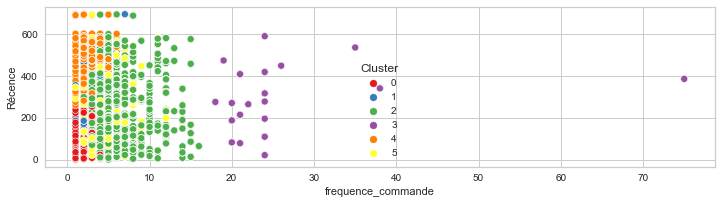

In [84]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
sns.color_palette("Set2")
sns.scatterplot(data=data_final,
                y='Récence',
                x='frequence_commande',
                hue='Cluster',
                palette='Set1')

<AxesSubplot:xlabel='Somme_depensee', ylabel='Récence'>

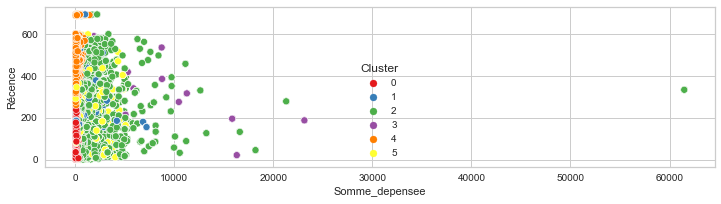

In [85]:
# Plot distribution of frequency
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 2)
sns.scatterplot(data=data_final,
                y='Récence',
                x='Somme_depensee',
                hue='Cluster',
                palette='Set1')

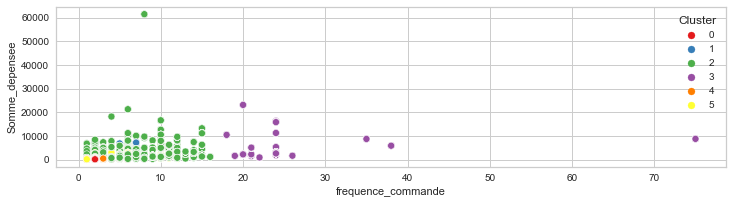

In [86]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 3)
sns.scatterplot(data=data_final,
                y='Somme_depensee',
                x='frequence_commande',
                hue='Cluster',
                palette='Set1')
# Show the plot
plt.show()

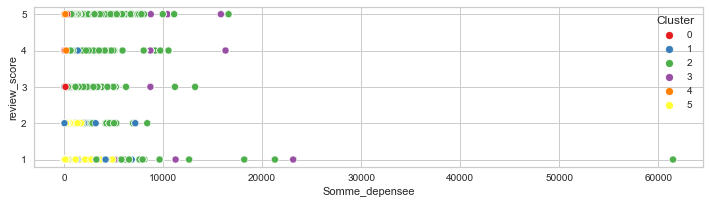

In [87]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 3)
sns.scatterplot(data=data_final,
                y='review_score',
                x='Somme_depensee',
                hue='Cluster',
                palette='Set1')
# Show the plot
plt.show()

Nous allons tenter d'autres algorithmes pour comparer les résultats avec les résultats du K-means.

# DBSCAN

On réalise une segmentation en DBSCAN pour comparer les résultats avec le K-means. Les métriques sont les suivantes : eps, qui définit le voisinage d'un point. Deux points sont considérés comme voisins si la distance entre les deux points est inférieure à un certain seuil
minPts : nombre minimum de points dans le voisinage pour former une région dense.
min_samples : le nombre minimum de voisins qu'un point donné doit avoir pour être classé comme un point central. Il est important de noter que le point lui-même est inclus dans le nombre minimum d'échantillons.

In [88]:
# Minimum of samples
min_samples = 100

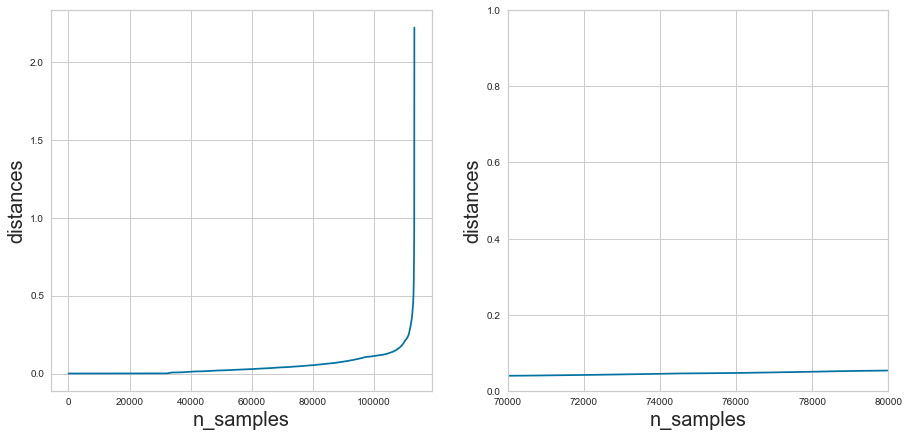

In [89]:
# Estimation de epsilon
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(distances)
plt.ylabel("distances", fontsize=20)
plt.xlabel("n_samples", fontsize=20)
plt.subplot(1, 2, 2)
plt.plot(distances)
plt.ylim([0, 1])
plt.xlim([70000, 80000])
plt.ylabel("distances", fontsize=20)
plt.xlabel("n_samples", fontsize=20)
plt.show()

In [90]:
# Entraînement du modèle DBSCAN
from sklearn.cluster import DBSCAN
import time

dbs_model = DBSCAN(min_samples=min_samples,
                   eps=0.4
                   )
begin_time = time.time()
dbs_model.fit(X_scaled)
end_time = time.time()
time_fit = "{:.2f}".format(end_time - begin_time)
print(f"Temps de fit : {time_fit} s")

Temps de fit : 18.42 s


In [91]:
dbs_model.labels_

array([ 0, -1, -1, ...,  1, -1, -1], dtype=int64)

In [92]:
n_clusters_ = len(set(dbs_model.labels_)) - (1 if -1 in dbs_model.labels_ else 0)
n_clusters_

5

In [149]:
for i,j in enumerate(data_final.columns[3:]):
    print('-----------------------------')
    print('Number of Clusters for EPS =',
          (i+1)/10,
          ':',
          data_final[j].nunique())
    for index, value in data_final[j].value_counts().sort_index().items():
        print(f'Cluster n°{index} -- Number of customers: {value}')
    print('-----------------------------')

-----------------------------
Number of Clusters for EPS = 0.1 : 610
Cluster n°0 -- Number of customers: 43
Cluster n°1 -- Number of customers: 69
Cluster n°2 -- Number of customers: 79
Cluster n°3 -- Number of customers: 81
Cluster n°4 -- Number of customers: 90
Cluster n°5 -- Number of customers: 141
Cluster n°6 -- Number of customers: 211
Cluster n°7 -- Number of customers: 257
Cluster n°8 -- Number of customers: 318
Cluster n°9 -- Number of customers: 275
Cluster n°10 -- Number of customers: 215
Cluster n°11 -- Number of customers: 236
Cluster n°12 -- Number of customers: 324
Cluster n°13 -- Number of customers: 401
Cluster n°14 -- Number of customers: 323
Cluster n°15 -- Number of customers: 322
Cluster n°16 -- Number of customers: 324
Cluster n°17 -- Number of customers: 214
Cluster n°18 -- Number of customers: 239
Cluster n°19 -- Number of customers: 279
Cluster n°20 -- Number of customers: 385
Cluster n°21 -- Number of customers: 408
Cluster n°22 -- Number of customers: 413
Clu

En faisant varier la valeur de l’hyperparamètre « eps », avec un hyperparamètre « min_sample » fixé à 100, nous remarquons que nous obtenons un nombre de clusters égal à 5, ce qui peut être intéressant pour l'étude. Ceci dit, L'utilisation de DBSCAN dans notre cas est inexploitable pour une utilisation métier car les clusters ne sont pas équilibrés. Nous avons par exemple des clusters contenants une dizaine de clients alors qu'un autre cluster en contient 112055. Nous n'irons pas plus loin donc sur notre algorithme DBSCAN.

# Agglomerative clustering

Le dendrogramme est une arborescence qui affiche les groupes formés par le regroupement des observations à chaque étape et leurs niveaux de similarité.Le niveau de similarité est mesuré le long de l'axe verticalet les différentes observations sont répertoriées le long de l'axe horizontal.

In [134]:
from sklearn.cluster import AgglomerativeClustering
model_agglo = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [135]:
X_agglo = data_final.iloc[:10000,:]

In [138]:
def plot_dendrogram(model, **kwargs):
    '''Create linkage matrix and then plot the dendrogram'''

    #On crée le nombre d'échantillons sous chaque nœud
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # On trace le dendrogramme correspondant :
    dendrogram(linkage_matrix, **kwargs)

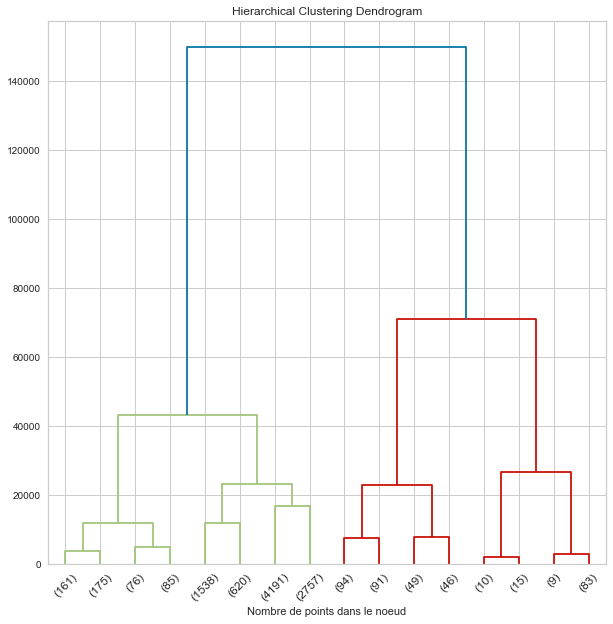

In [150]:
from scipy.cluster.hierarchy import dendrogram
model_agglo = model_agglo.fit(X_agglo)
plt.figure(figsize=(10,10))
plt.title('Hierarchical Clustering Dendrogram')

# On trace les 3 premiers niveaux du dendogramme
plot_dendrogram(model_agglo, truncate_mode='level', p=3)
plt.xlabel("Nombre de points dans le noeud")
plt.xticks(rotation=45)
plt.show()

Après des tests avec l'agglomerative clustering, nous constatons qu'il faut réduire notre dataset : Il est nécessaire dans notre cas de réaliser le test sur une partie de notre jeu de donnée.
Si nous le réalisons sur l'ensemble du jeu de données, le clustering risque d'être totalement différent 
Les clusters ne sont pas équilibrés et s'étalent, dans notre exemple, de 9 individus à 4191 individus, ce qui n'est pas exploitable dans une problématique métier.

In [ ]:
Notre choix reste donc porté sur le K-means pour cette segmentation.

# Proposition de regroupement des clients :

On peut regrouper nos clients en 6 clusters, grâce à notre analyse :

Nouveaux clients : Clients qui ont commandé récemment et qui n'ont pas dépensé beaucoup d'argent (Cluster 0)

Clients « compliqués » : Délais de livraison tardifs  (Cluster 1)

Clients fidèles  : Clients très satisfaits, qui commandent souvent et qui dépensent pas mal d'argent (Cluster 2)

Meilleurs clients : Clients qui commandent le plus fréquemment et qui dépensent le plus d'argent (Cluster 3)

Clients rares : Clients satisfaits mais dont les commandes sont les moins fréquentes et les moins récentes (Cluster 4)

Clients très insatisfaits : Une attention très particulière doit être réservée à ce groupe (Cluster 5)